# ML5 - Heart Disease Prediction using Logistic Regression


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [7]:
# dataset
disease_df = pd.read_csv("D:/Desktop/framingham.csv")

disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
disease_df.drop(['education'], inplace = True, axis = 1)

disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

disease_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [10]:
disease_df.dropna(inplace=True, axis=0)

disease_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


In [11]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


Note: ```TenYearCHD```, our target variable stands for 10 year coronary heart disease risk.

In [13]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X, y

(array([[ 39. ,   1. ,   0. , 195. , 106. ,  77. ],
        [ 46. ,   0. ,   0. , 250. , 121. ,  76. ],
        [ 48. ,   1. ,  20. , 245. , 127.5,  70. ],
        ...,
        [ 52. ,   0. ,   0. , 269. , 133.5, 107. ],
        [ 40. ,   1. ,   0. , 185. , 141. ,  72. ],
        [ 39. ,   0. ,  30. , 196. , 133. ,  80. ]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [14]:
# normalization of the dataset -> easier processing

scaler = preprocessing.StandardScaler()

X = scaler.fit(X).transform(X)

In [15]:
# Train/Test -Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


<Axes: xlabel='TenYearCHD', ylabel='count'>

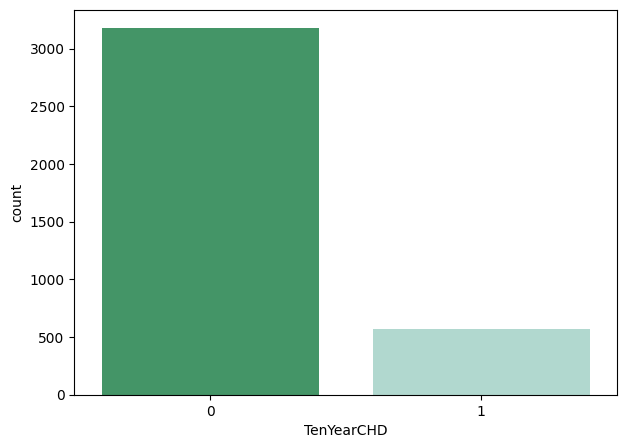

In [19]:
import warnings
warnings.filterwarnings('ignore')

# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")


In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()   # creating the instance
logreg.fit(X_train, y_train)   # fitting the instance
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of the model: ', str(round(accuracy, 2)) + "%")

Accuracy of the model:  84.9%


In [36]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)   # confusion matrix instance cm

cm

array([[942,   9],
       [161,  14]], dtype=int64)

In [37]:
# turning cm into a visually appealing cm by labeling rows/cols
conf_matrix = pd.DataFrame(data = cm,   
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

conf_matrix

,Predicted:0,Predicted:1
Actual:0,942,9
Actual:1,161,14


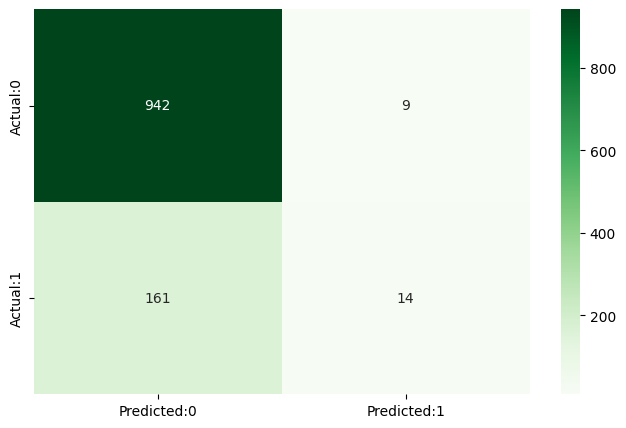

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [34]:
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") # 'd' shows anots as ints

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

That's it for this little project.👾

### Conclusions and learnings

* whats is a confusion matrix and how do you implement it
    * shows predictions as well as false positives and true negatives
* how and when to use logistic regression
* working with y_pred instead jumping straight to the evaluation
* using the classification report